In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import glob, os
from astropy.io import fits

In [2]:
current_dir = os.getcwd()
dir_iraf = "/data/jlee/HSCv6/M81/MMT_2022A/spectra/velocity/"
os.chdir(dir_iraf)

from pyraf import iraf
from pyraf.iraf import rvsao

iraf.unlearn()
os.chdir(current_dir)
iraf.chdir(current_dir)

In [3]:
try:
    iraf.xcsao
except AttributeError:
    print("Please check again.")

In [4]:
dir_root = "/data/jlee/HSCv6/M81/MMT_2022A/process/"
obsID = "2022.0302"
dir_skysub = dir_root + obsID + "/reduction/0100/skysub_target1_1/"
spfile = sorted(glob.glob(dir_skysub+"*.fits"))
dir_skysub

'/data/jlee/HSCv6/M81/MMT_2022A/process/2022.0302/reduction/0100/skysub_target1_1/'

In [5]:
if glob.glob("binning") == []:
    os.system("mkdir binning")
else:
    os.system("rm -rfv binning/*")

for i in np.arange(len(spfile)):
    os.system("cp -rpv "+spfile[i]+" binning/"+spfile[i].split('/')[-1].split('.fits')[0]+".bin1.fits")
    
f = open("bin1.list", "w")
for i in np.arange(len(spfile)):
    f.write("binning/"+spfile[i].split('/')[-1].split('.fits')[0]+'.bin1.fits'+"\n")
f.close()

f = open("bin2.list", "w")
for i in np.arange(len(spfile)):
    f.write("binning/"+spfile[i].split('/')[-1].split('.fits')[0]+'.bin2.fits'+"\n")
f.close()

f = open("bin4.list", "w")
for i in np.arange(len(spfile)):
    f.write("binning/"+spfile[i].split('/')[-1].split('.fits')[0]+'.bin4.fits'+"\n")
f.close()

In [6]:
dir_temp = "/home/jlee/anaconda3/envs/geminiconda/iraf_extern/rvsao/templates/"
temp_GC = sorted(glob.glob(dir_temp+"m31*.fits"))
temp_Astar = sorted(glob.glob(dir_temp+"astar*.fits"))
temp_QSO = sorted(glob.glob(dir_temp+"sdss_qso.fits"))
temp_El = sorted(glob.glob(dir_temp+"e*temp.fits"))
temp_Sp = sorted(glob.glob(dir_temp+"sptemp.fits"))
temp_gal = sorted(glob.glob(dir_temp+"h*temp0.fits"))
temps = temp_GC + temp_Astar + temp_QSO + temp_El + temp_Sp + temp_gal

if glob.glob("template_copy") == []:
    os.system("mkdir template_copy")
else:
    os.system("rm -rfv template_copy/*")
    
for i in np.arange(len(temps)):
    os.system("cp -rpv "+temps[i]+" template_copy/")
g = open("templates.list", "w")
for i in np.arange(len(temps)):
    g.write("template_copy/"+temps[i].split("/")[-1]+"\n")
g.close()

In [7]:
def plot_temspec(templist):
    for i in np.arange(len(templist)):
        d, h = fits.getdata(templist[i], header=True)
        try:
            cdel = h['CD1_1']
        except:
            cdel = h['CDELT1']
        if (h['CRVAL1'] > 10.0):
            wav = h['CRVAL1'] + cdel*np.arange(h['NAXIS1'])
        else:
            wav = 10.0**(h['CRVAL1'] + cdel*np.arange(h['NAXIS1']))
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(wav, d)
        ax.set_xlim([wav.min()-0.025*(wav.max()-wav.min()), wav.max()+0.025*(wav.max()-wav.min())])
        ax.set_ylim([d.min()-0.5*(d.max()-d.min()), d.max()+0.75*(d.max()-d.min())])
        ax.set_xlabel(r"Wavelength [${\rm \AA}$]", fontsize=15.0)
        ax.set_ylabel("Normalized count", fontsize=15.0)
        ax.tick_params(axis="both", labelsize=15.0)
        ax.tick_params(width=1.25, length=7.0)
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(1.25)
        ax.text(0.04, 0.95, templist[i].split('/')[-1].split('.fits')[0],
                fontsize=16.0, fontweight='bold', color='k',
                ha='left', va='top', transform=ax.transAxes)
        plt.tight_layout()
        plt.savefig(templist[i].split('/')[-1].split('.fits')[0]+".png", dpi=300)

<IPython.core.display.Javascript object>


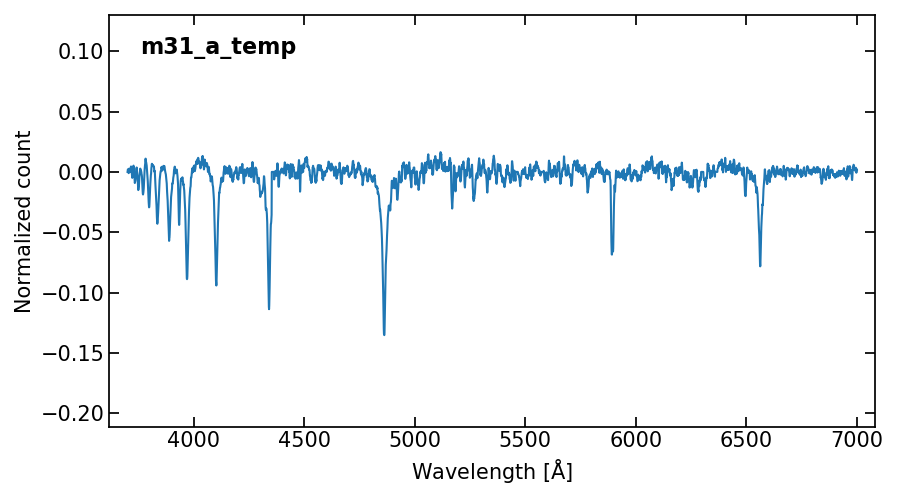

<IPython.core.display.Javascript object>


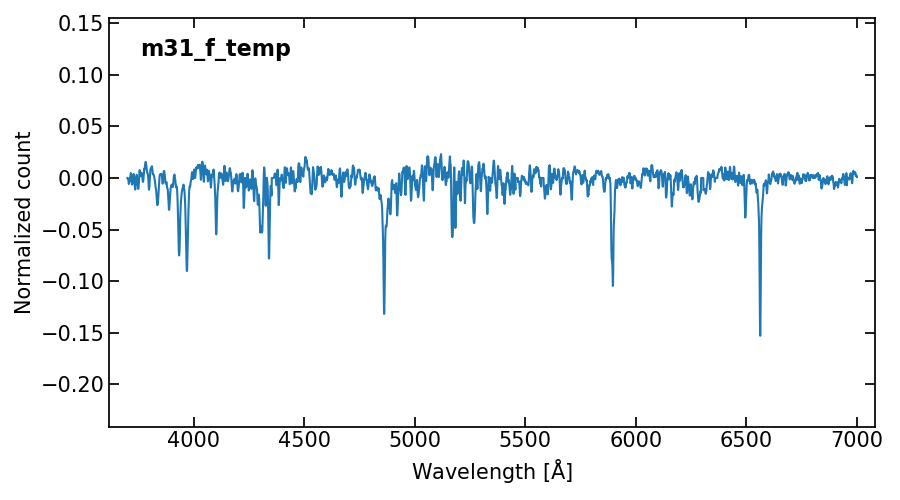

<IPython.core.display.Javascript object>


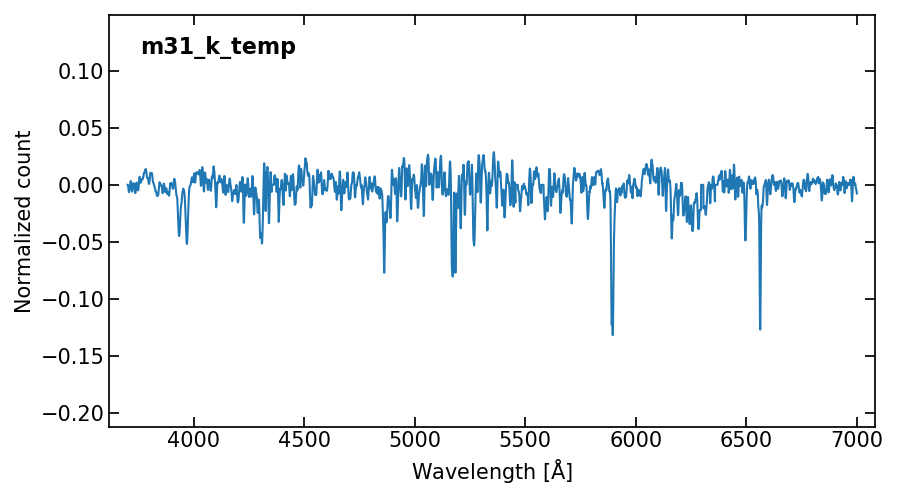

In [8]:
plot_temspec(temp_GC)

<IPython.core.display.Javascript object>


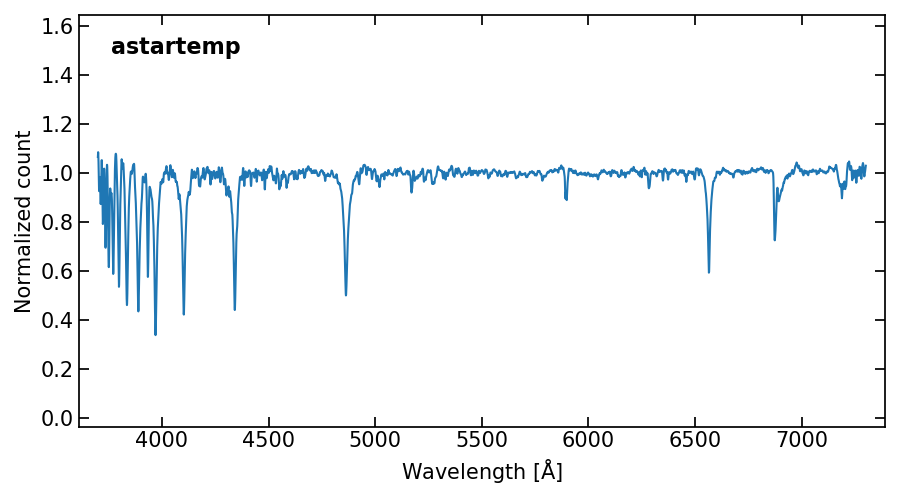

In [9]:
plot_temspec(temp_Astar)

<IPython.core.display.Javascript object>


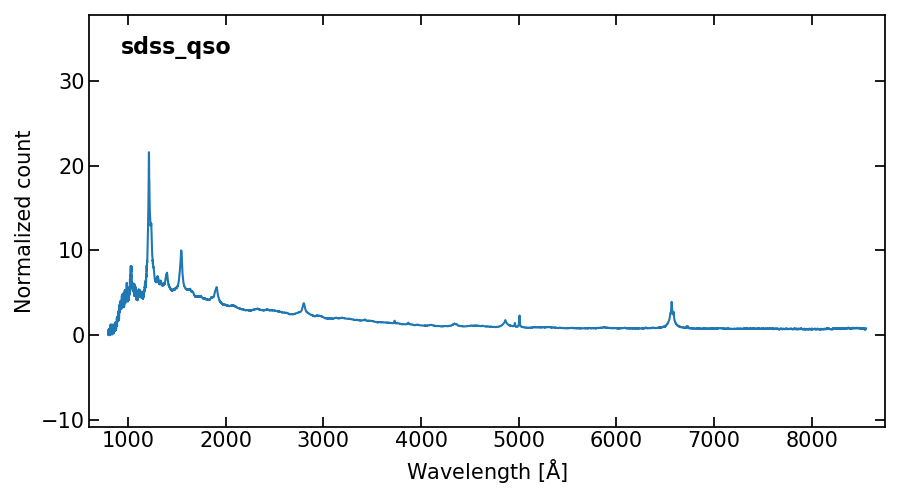

In [10]:
plot_temspec(temp_QSO)

<IPython.core.display.Javascript object>


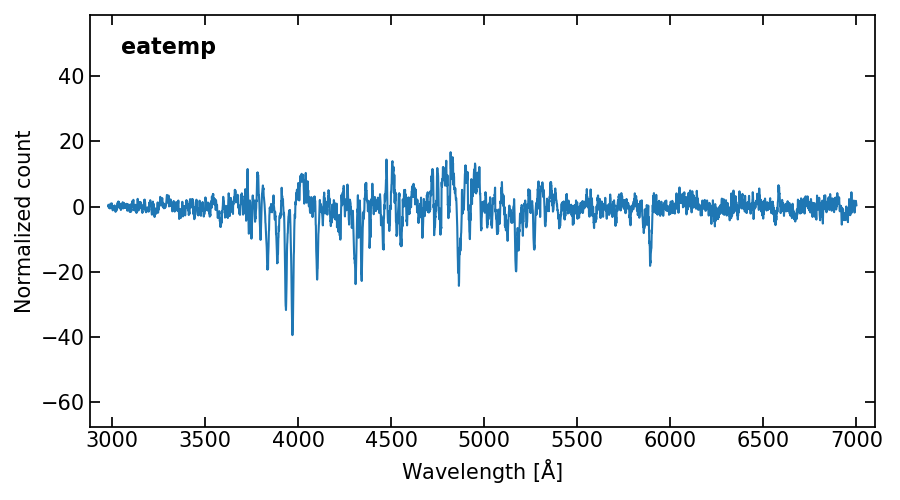

<IPython.core.display.Javascript object>


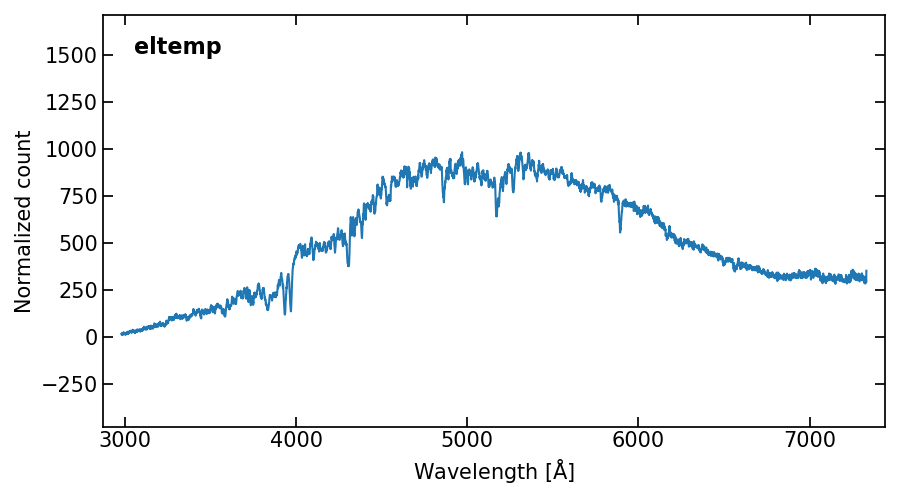

In [11]:
plot_temspec(temp_El)

<IPython.core.display.Javascript object>


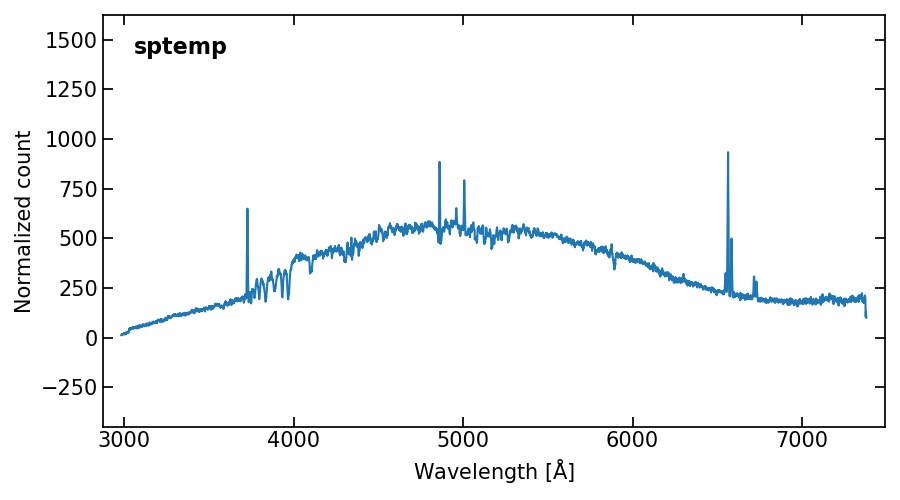

In [12]:
plot_temspec(temp_Sp)

<IPython.core.display.Javascript object>


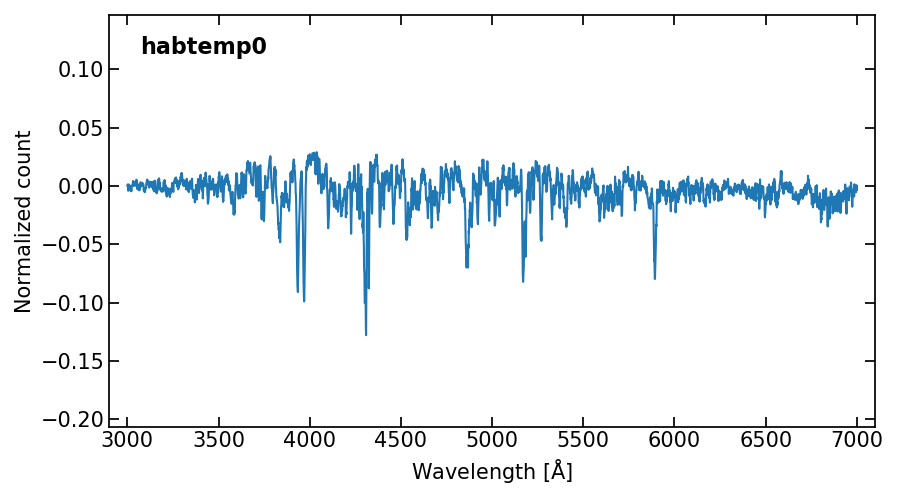

<IPython.core.display.Javascript object>


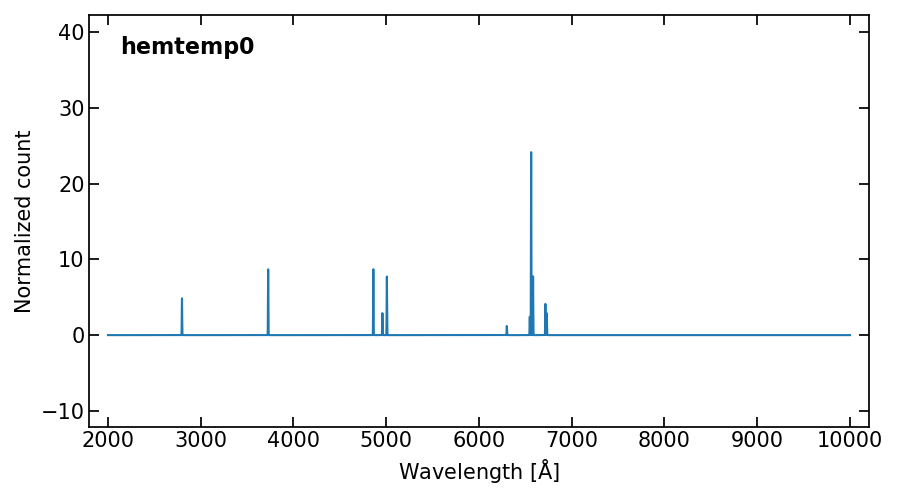

In [13]:
plot_temspec(temp_gal)

In [21]:
# os.system("rm -rfv binning/*.bin2.fits")
# iraf.blkavg(input="@bin1.list", output="@bin2.list", b1=2, b2=1, b3=1)

# os.system("rm -rfv binning/*.bin4.fits")
# iraf.blkavg(input="@bin1.list", output="@bin4.list", b1=4, b2=1, b3=1)

In [20]:
# iraf.xcsao(spectra="@bin1.list", templates="@templates.list", st_lambda=3800., end_lambda=5400.,
#            svel_corr="heliocentric", save_vel="yes")

In [19]:
# iraf.xcsao(spectra="@bin2.list", templates="@templates.list", st_lambda=3800., end_lambda=5400.,
#            svel_corr="heliocentric", save_vel="yes")

In [18]:
# iraf.xcsao(spectra="@bin4.list", templates="@templates.list", st_lambda=3800., end_lambda=5400.,
#            svel_corr="heliocentric", save_vel="yes")